<a href="https://colab.research.google.com/github/Dhruvank198630/Decisiontrees-randomforest-boost/blob/main/decision_trees%2Crandom_forest%2Cgradient_boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier



In [ ]:
data1 = pd.read_csv('heart.csv')
print(data1.shape)

(918, 12)


In [ ]:
print(data1.describe)

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

In [ ]:
print(data1.head)

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [ ]:
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

In [ ]:
# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.
data2 = pd.get_dummies(data = data1,
                         prefix = cat_variables,
                         columns = cat_variables)

In [ ]:
features = [x for x in data2.columns if x not in 'HeartDisease'] ## Removing our target variable

In [ ]:
print(len(features))

20


In [ ]:
X_train, X_test, Y_train, Y_test =  train_test_split(data2[features], data2['HeartDisease'], train_size = 0.8)

In [ ]:
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 500, 700]
max_depth_list = [1, 2, 4, 8, 16, 32, 64, None]


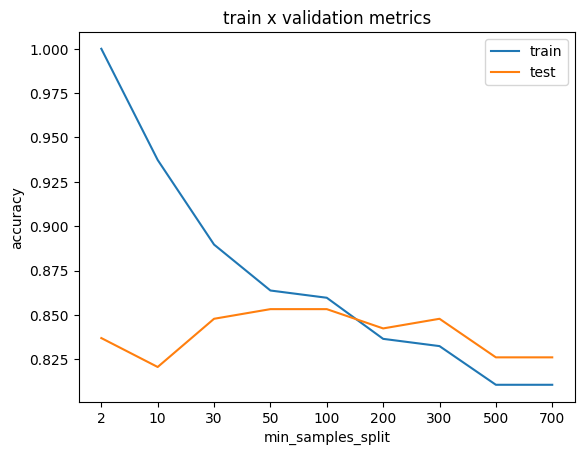

In [ ]:
accuracy_train_list = []
accuracy_test_split = []
for min_samples_split in min_samples_split_list:
  model  = DecisionTreeClassifier(min_samples_split=min_samples_split)
  model.fit(X_train, Y_train)
  predictions_train = model.predict(X_train)
  predictions_test = model.predict(X_test)
  accuracy_train = accuracy_score(predictions_train, Y_train)
  accuracy_test = accuracy_score(predictions_test, Y_test)
  accuracy_train_list.append(accuracy_train)
  accuracy_test_split.append(accuracy_test)


plt.title('train x validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_train_list)
plt.plot(accuracy_test_split)
plt.legend(['train', 'test'])



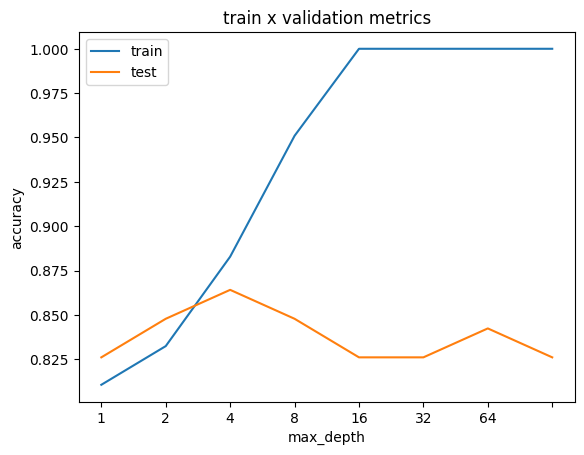

In [ ]:
accuracy_train_list = []
accuracy_test_split = []
for max_depth in max_depth_list:
  model  = DecisionTreeClassifier(max_depth=max_depth)
  model.fit(X_train, Y_train)
  predictions_train = model.predict(X_train)
  predictions_test = model.predict(X_test)
  accuracy_train = accuracy_score(predictions_train, Y_train)
  accuracy_test = accuracy_score(predictions_test, Y_test)
  accuracy_train_list.append(accuracy_train)
  accuracy_test_split.append(accuracy_test)


plt.title('train x validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_train_list)
plt.plot(accuracy_test_split)
plt.legend(['train', 'test'])


In [ ]:
decision_tree_model = DecisionTreeClassifier(min_samples_split=4, max_depth=50)
decision_tree_model.fit(X_train, Y_train)
print(f" the accuracy on training set is = {accuracy_score(decision_tree_model.predict(X_train), Y_train):.4f}")
print(f" the accuracy on test set is = {accuracy_score(decision_tree_model.predict(X_test), Y_test):.4f}")

 the accuracy on training set is = 0.9796
 the accuracy on test set is = 0.8315


In [ ]:
# now using random forest algorithm in which there is collection of decision trees
# here we will choose a subset of parameters (not all the parameters) which will approx. equal to sqrt(n), where n = no. of parameters

In [ ]:
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 500, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500] #no. of decision trees

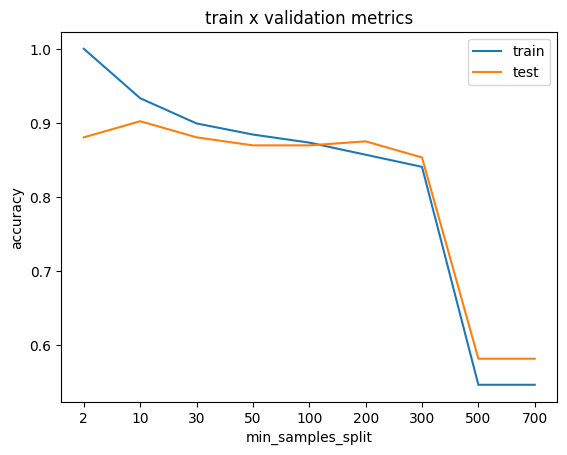

In [ ]:
accuracy_train_list = []
accuracy_test_split = []
for min_samples_split in min_samples_split_list:
  model  = RandomForestClassifier(min_samples_split=min_samples_split)
  model.fit(X_train, Y_train)
  predictions_train = model.predict(X_train)
  predictions_test = model.predict(X_test)
  accuracy_train = accuracy_score(predictions_train, Y_train)
  accuracy_test = accuracy_score(predictions_test, Y_test)
  accuracy_train_list.append(accuracy_train)
  accuracy_test_split.append(accuracy_test)


plt.title('train x validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_train_list)
plt.plot(accuracy_test_split)
plt.legend(['train', 'test'])



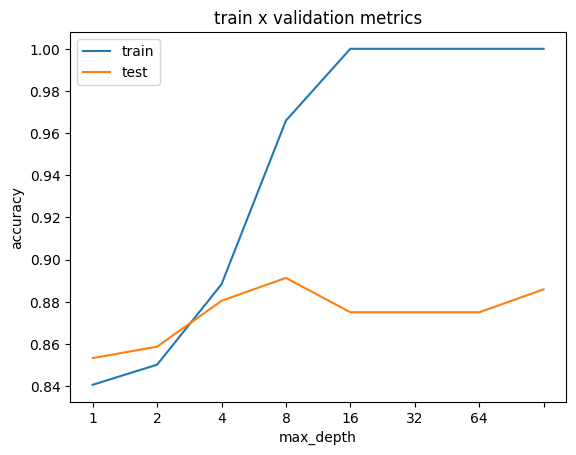

In [ ]:
accuracy_train_list = []
accuracy_test_split = []
for max_depth in max_depth_list:
  model  = RandomForestClassifier(max_depth=max_depth)
  model.fit(X_train, Y_train)
  predictions_train = model.predict(X_train)
  predictions_test = model.predict(X_test)
  accuracy_train = accuracy_score(predictions_train, Y_train)
  accuracy_test = accuracy_score(predictions_test, Y_test)
  accuracy_train_list.append(accuracy_train)
  accuracy_test_split.append(accuracy_test)


plt.title('train x validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_train_list)
plt.plot(accuracy_test_split)
plt.legend(['train', 'test'])



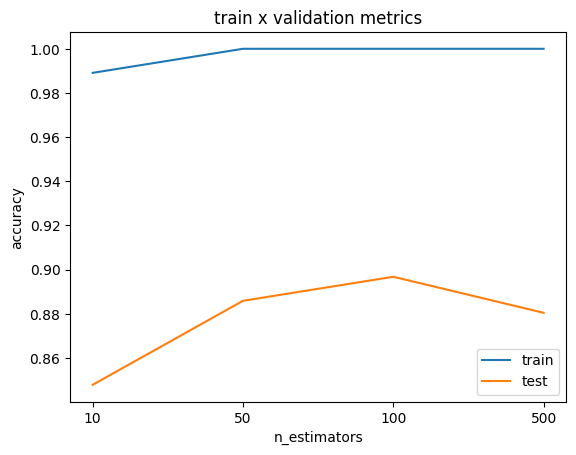

In [ ]:
accuracy_train_list = []
accuracy_test_split = []
for n_estimators in n_estimators_list:
  model  = RandomForestClassifier(n_estimators=n_estimators)
  model.fit(X_train, Y_train)
  predictions_train = model.predict(X_train)
  predictions_test = model.predict(X_test)
  accuracy_train = accuracy_score(predictions_train, Y_train)
  accuracy_test = accuracy_score(predictions_test, Y_test)
  accuracy_train_list.append(accuracy_train)
  accuracy_test_split.append(accuracy_test)


plt.title('train x validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list)), labels=n_estimators_list)
plt.plot(accuracy_train_list)
plt.plot(accuracy_test_split)
plt.legend(['train', 'test'])



In [ ]:
random_forest_model = RandomForestClassifier(min_samples_split=10 , max_depth=8 , n_estimators=100)
random_forest_model.fit(X_train, Y_train)
print(f" the accuracy on training set is = {accuracy_score(random_forest_model.predict(X_train), Y_train):.4f}")
print(f" the accuracy on test set is = {accuracy_score(random_forest_model.predict(X_test), Y_test):.4f}")

 the accuracy on training set is = 0.9251
 the accuracy on test set is = 0.8750


In [ ]:
n = int(len(X_train)*8)

In [ ]:
X_train_fit, X_train_eval, Y_train_fit, Y_train_eval = X_train[:n], X_train[n:], Y_train[:n], Y_train[n:]

In [ ]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1)
xgb_model.fit(X_train_fit, Y_train_fit, eval_set = [(X_train_eval,Y_train_eval)], early_stopping_rounds = 10)

[0]	validation_0-logloss:0.00000
[1]	validation_0-logloss:0.00000
[2]	validation_0-logloss:0.00000
[3]	validation_0-logloss:0.00000
[4]	validation_0-logloss:0.00000
[5]	validation_0-logloss:0.00000
[6]	validation_0-logloss:0.00000
[7]	validation_0-logloss:0.00000
[8]	validation_0-logloss:0.00000
[9]	validation_0-logloss:0.00000
[10]	validation_0-logloss:0.00000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
,xgb_model.best_iteration

0

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),Y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),Y_test):.4f}")

Metrics train:
	Accuracy score: 0.7847
Metrics test:
	Accuracy score: 0.8207
